In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load the Excel file
file_path = 'fictitious_SoftwareData.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

In [6]:
# 1. Which process model is mostly used?
most_used_process_model = data['Project Process Model'].mode()[0]
print(f"Most used process model: {most_used_process_model}")

Most used process model: Scrum


In [7]:
# 2. What is the average project size?
average_project_size = data['Project Size KLOC'].mean()
print(f"Average project size: {average_project_size} KLOC")

Average project size: 495.67 KLOC


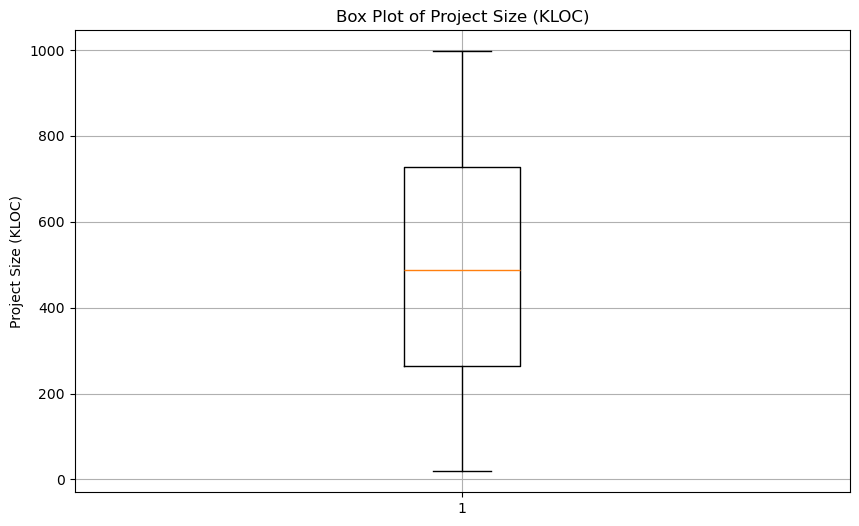

In [8]:
# 3. Is there an outlier in project size?
plt.figure(figsize=(10, 6))
plt.boxplot(data['Project Size KLOC'])
plt.title('Box Plot of Project Size (KLOC)')
plt.ylabel('Project Size (KLOC)')
plt.grid(True)
plt.show()

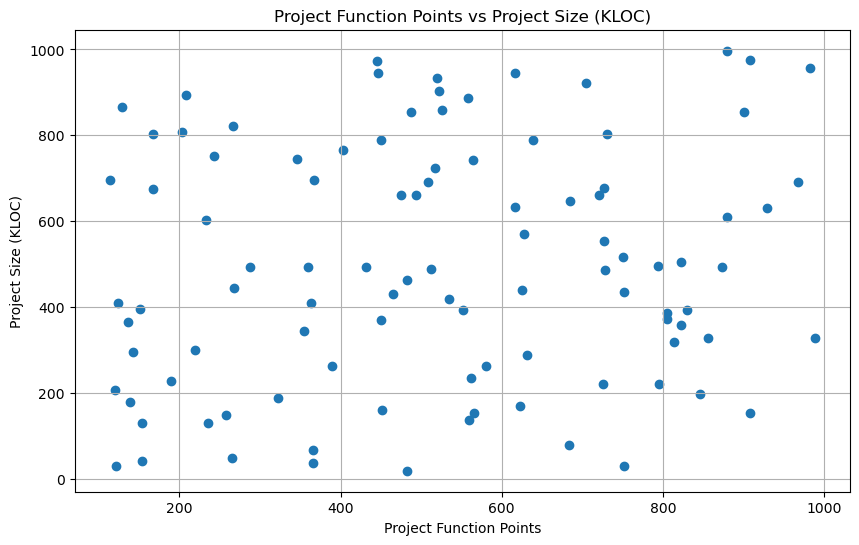

In [9]:
# 4. Bi-variate analysis of project function points and project function size
plt.figure(figsize=(10, 6))
plt.scatter(data['Project Function Points'], data['Project Size KLOC'])
plt.title('Project Function Points vs Project Size (KLOC)')
plt.xlabel('Project Function Points')
plt.ylabel('Project Size (KLOC)')
plt.grid(True)
plt.show()

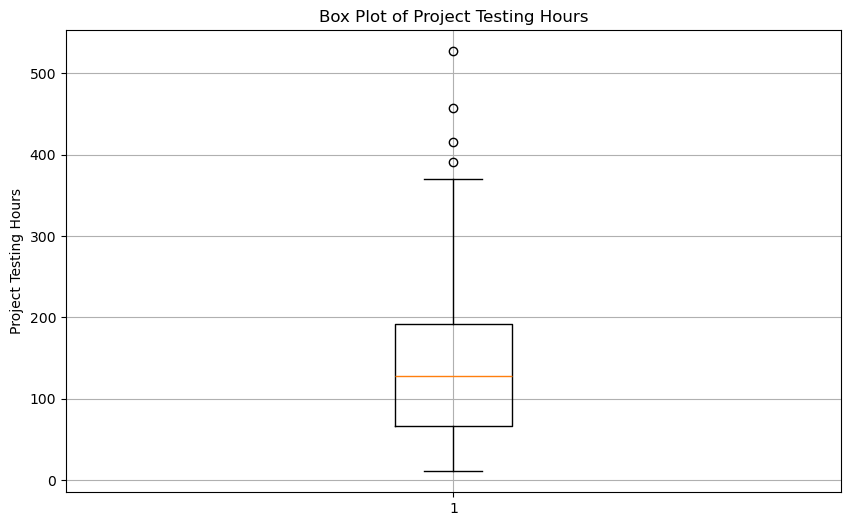

In [10]:
# 5. Box plot of project testing hours
plt.figure(figsize=(10, 6))
plt.boxplot(data['Project Testing Hours'])
plt.title('Box Plot of Project Testing Hours')
plt.ylabel('Project Testing Hours')
plt.grid(True)
plt.show()=

In [11]:
# 6. Total project hours and project testing hours
summary_total_hours = data['Total Project Hours'].describe()
summary_testing_hours = data['Project Testing Hours'].describe()
print(f"Summary of Total Project Hours:\n{summary_total_hours}")
print(f"Summary of Project Testing Hours:\n{summary_testing_hours}")

Summary of Total Project Hours:
count      100.000000
mean      6554.075420
std       3120.343869
min       1212.576599
25%       3873.917371
50%       6799.734658
75%       8712.105994
max      13612.772067
Name: Total Project Hours, dtype: float64
Summary of Project Testing Hours:
count    100.000000
mean     146.764650
std      103.857900
min       10.799728
25%       66.050048
50%      128.447076
75%      191.534433
max      527.220653
Name: Project Testing Hours, dtype: float64


  Project ID  Total Project Hours  Project Testing Hours  \
0  Project_1          2899.603769              66.097158   
1  Project_2          1605.733807              30.034437   
2  Project_3          5670.258630             129.716838   
3  Project_4          5165.632637              75.294442   
4  Project_5          4994.273585             134.787800   

   Testing Hours Percentage  
0                  2.279524  
1                  1.870449  
2                  2.287671  
3                  1.457603  
4                  2.698847  
Summary of Testing Hours Percentage:
count    100.000000
mean       2.232692
std        0.942817
min        0.535887
25%        1.514285
50%        2.085638
75%        2.922529
max        4.812128
Name: Testing Hours Percentage, dtype: float64


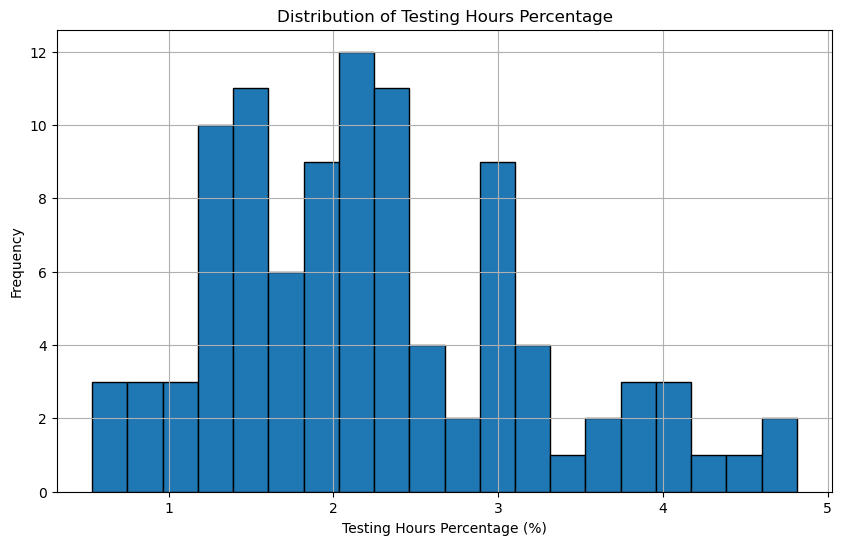

In [19]:
# Calculate the percentage of time spent on testing for each project
data['Testing Hours Percentage'] = (data['Project Testing Hours'] / data['Total Project Hours']) * 100

# Display the first few rows to verify the calculation
print(data[['Project ID', 'Total Project Hours', 'Project Testing Hours', 'Testing Hours Percentage']].head())

# Summary statistics of the testing hours percentage
testing_hours_percentage_summary = data['Testing Hours Percentage'].describe()
print(f"Summary of Testing Hours Percentage:\n{testing_hours_percentage_summary}")

# Visualize the distribution of testing hours percentage
plt.figure(figsize=(10, 6))
plt.hist(data['Testing Hours Percentage'], bins=20, edgecolor='black')
plt.title('Distribution of Testing Hours Percentage')
plt.xlabel('Testing Hours Percentage (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [13]:
# 8. Summary of mean time to error
mean_time_to_error_summary = data['Mean Time to Error'].describe()
print(f"Summary of Mean Time to Error:\n{mean_time_to_error_summary}")

Summary of Mean Time to Error:
count    100.000000
mean      49.453643
std       31.873878
min        0.643364
25%       18.161840
50%       50.867563
75%       79.544779
max       99.838991
Name: Mean Time to Error, dtype: float64


In [14]:
# 9. Correlation between number of errors in Alpha testing, Beta testing, and after release
correlation_matrix = data[['Number of defects found in Alpha testing', 'Number of defects found in Beta Testing',
                           'Number of defects after release']].corr()
print(f"Correlation Matrix:\n{correlation_matrix}")

Correlation Matrix:
                                          Number of defects found in Alpha testing  \
Number of defects found in Alpha testing                                  1.000000   
Number of defects found in Beta Testing                                   0.113787   
Number of defects after release                                          -0.760638   

                                          Number of defects found in Beta Testing  \
Number of defects found in Alpha testing                                 0.113787   
Number of defects found in Beta Testing                                  1.000000   
Number of defects after release                                         -0.556783   

                                          Number of defects after release  
Number of defects found in Alpha testing                        -0.760638  
Number of defects found in Beta Testing                         -0.556783  
Number of defects after release                                  1

In [16]:
# 10. Evaluate tester performance based on the number of defects found and resolved
tester_performance = data.groupby('Tester ID')[['Number of defects found in Alpha testing',
                                                'Number of defects found in Beta Testing',
                                                'Number of defects after release']].sum()
tester_performance['Total Defects Found'] = tester_performance['Number of defects found in Alpha testing']
                                            + tester_performance['Number of defects found in Beta Testing']
tester_performance['Defects Resolved'] = tester_performance['Total Defects Found']
                                            - tester_performance['Number of defects after release']
tester_performance = tester_performance.sort_values(by='Defects Resolved', ascending=False)
print(f"Tester Performance:\n{tester_performance}")

Tester Performance:
           Number of defects found in Alpha testing  \
Tester ID                                             
Tester_9                                        175   
Tester_4                                        132   
Tester_7                                         97   
Tester_11                                       120   
Tester_12                                        77   
Tester_3                                         76   
Tester_14                                        69   
Tester_16                                        31   
Tester_10                                        81   
Tester_17                                        32   
Tester_13                                        38   
Tester_15                                        12   
Tester_6                                         18   
Tester_2                                         32   
Tester_5                                          2   
Tester_20                                    